In [244]:
# running pyspark locally
# setup instructions: https://sparkbyexamples.com/pyspark/install-pyspark-in-anaconda-jupyter-notebook/
import pyspark
import pandas as pd         
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
	    .builder \
	    .appName('NYC Covid-19 Transportation Analysis - Citi Bike') \
	    .getOrCreate()

In [245]:
# load the csv files
citibike2019 = spark.read.csv(path = '../data/citibike/citibike2019.csv', header = True)
citibike2020 = spark.read.csv(path = '../data/citibike/citibike2020.csv', header = True)
citibike2022 = spark.read.csv(path = '../data/citibike/citibike2022.csv', header = True)

In [246]:
# take a look at each DataFrame
citibike2019.limit(5).toPandas()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.7162469,-74.0334588,3214,Essex Light Rail,40.7127742,-74.0364857,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.7162469,-74.0334588,3192,Liberty Light Rail,40.7112423,-74.0557013,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.7162469,-74.0334588,3638,Washington St,40.7242941,-74.0354826,29522,Customer,1969,0


In [247]:
citibike2020.limit(5).toPandas()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3211,Newark Ave,40.72152515,-74.046304543,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3269,Brunswick & 6th,40.72601172964625,-74.05038893222809,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3269,Brunswick & 6th,40.72601172964625,-74.05038893222809,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.73089709786179,-74.06391263008118,3280,Astor Place,40.71928220070702,-74.07126188278198,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.71958611647166,-74.04311746358871,3276,Marin Light Rail,40.71458403535893,-74.04281705617905,29276,Subscriber,1983,2


In [248]:
citibike2022.limit(5).toPandas()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604142368964,-74.02402013540268,40.750604142368964,-74.02402013540268,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.7127742,-74.0364857,40.7127742,-74.0364857,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.7127742,-74.0364857,40.7127742,-74.0364857,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604142368964,-74.02402013540268,40.750604142368964,-74.02402013540268,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604142368964,-74.02402013540268,40.750604142368964,-74.02402013540268,member


In [249]:
# number of rows and cols in each DataFrame
print('citibike2019: ({}, {})'.format(citibike2019.count(), len(citibike2019.columns)))
print('citibike2020: ({}, {})'.format(citibike2020.count(), len(citibike2020.columns)))
print('citibike2022: ({}, {})'.format(citibike2022.count(), len(citibike2022.columns)))

citibike2019: (404947, 15)
citibike2020: (336802, 15)
citibike2022: (895485, 13)


In [250]:
# remove duplicate records in each DataFrame
citibike2019 = citibike2019.distinct()
citibike2020 = citibike2020.distinct()

# since each ride in the 2022 data has a 'ride_id', we will filter based on this column
citibike2022 = citibike2022.dropDuplicates(['ride_id'])

In [251]:
# 13451 duplicate records have been removed from the 2020 data
print('updated citibike2019: ({}, {})'.format(citibike2019.count(), len(citibike2019.columns)))
print('updated citibike2020: ({}, {})'.format(citibike2020.count(), len(citibike2020.columns)))
print('updated citibike2022: ({}, {})'.format(citibike2022.count(), len(citibike2022.columns)))

updated citibike2019: (404947, 15)


updated citibike2020: (323351, 15)


updated citibike2022: (895485, 13)


In [252]:
# create a new column 'startdate' by extracting the first 10 characters of 'starttime'/'started_at' column
citibike2019 = citibike2019.withColumn('startdate', substring(col('starttime'), 1, 10))
citibike2020 = citibike2020.withColumn('startdate', substring(col('starttime'), 1, 10))
citibike2022 = citibike2022.withColumn('startdate', substring(col('started_at'), 1, 10))

In [253]:
# new column 'startdate' has been created
citibike2019.limit(5).toPandas()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate
0,99,2019-01-03 09:03:14.0790,2019-01-03 09:04:53.3530,3183,Exchange Place,40.7162469,-74.0334588,3639,Harborside,40.7192517,-74.034234,26208,Subscriber,1963,1,2019-01-03
1,154,2019-01-22 20:57:41.1710,2019-01-22 21:00:15.9520,3183,Exchange Place,40.7162469,-74.0334588,3214,Essex Light Rail,40.7127742,-74.0364857,26155,Subscriber,1982,1,2019-01-22
2,625,2019-01-24 18:30:19.0510,2019-01-24 18:40:44.8630,3183,Exchange Place,40.7162469,-74.0334588,3192,Liberty Light Rail,40.7112423,-74.0557013,29126,Subscriber,1985,1,2019-01-24
3,195,2019-01-15 19:22:32.6100,2019-01-15 19:25:47.9200,3184,Paulus Hook,40.7141454,-74.0335519,3267,Morris Canal,40.7124188237569,-74.03852552175522,26275,Subscriber,1990,1,2019-01-15
4,309,2019-01-15 22:53:45.0870,2019-01-15 22:58:54.5550,3184,Paulus Hook,40.7141454,-74.0335519,3638,Washington St,40.7242941,-74.0354826,26208,Subscriber,1986,2,2019-01-15


In [254]:
# perform another data cleaning to make sure each DF only contains the data for its corresponding year
citibike2019 = citibike2019.filter(substring(col('startdate'), 1, 4).like('2019'))
citibike2020 = citibike2020.filter(substring(col('startdate'), 1, 4).like('2020'))
citibike2022 = citibike2022.filter(substring(col('startdate'), 1, 4).like('2022'))

In [255]:
# check the shape one more time, the data is now ready to use
print('updated citibike2019: ({}, {})'.format(citibike2019.count(), len(citibike2019.columns)))
print('updated citibike2020: ({}, {})'.format(citibike2020.count(), len(citibike2020.columns)))
print('updated citibike2022: ({}, {})'.format(citibike2022.count(), len(citibike2022.columns)))

updated citibike2019: (404947, 16)


updated citibike2020: (323351, 16)


updated citibike2022: (895485, 14)


In [256]:
# find the daily total trips count of each date in 2019
daily_trips_count_2019 = citibike2019.groupBy('startdate').agg(count('*').alias('daily_trips_count')).orderBy('startdate')

# examine the DF
daily_trips_count_2019.toPandas()

,startdate,daily_trips_count
0,2019-01-01,431
1,2019-01-02,827
2,2019-01-03,860
3,2019-01-04,900
4,2019-01-05,308
...,...,...
360,2019-12-27,727
361,2019-12-28,577
362,2019-12-29,353
363,2019-12-30,327


In [257]:
# find the daily total trips count of each date in 2020
daily_trips_count_2020 = citibike2020.groupBy('startdate').agg(count('*').alias('daily_trips_count')).orderBy('startdate')

In [258]:
# find the daily total trips count of each date in 2022
daily_trips_count_2022 = citibike2022.groupBy('startdate').agg(count('*').alias('daily_trips_count')).orderBy('startdate')

In [259]:
# find the 7-day moving average in 2019, 2020, and 2022
# this is useful for smoothing out fluctuations in the daily trips count and identifying longer-term trends

# convert the 'daily_trips_count' column into a Python list for calculation
daily_trips_count_2019_list = daily_trips_count_2019.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

# computes the rolling mean of daily_trips_count_2019_list with a window size of 7
movingAvg2019 = pd.Series(daily_trips_count_2019_list).rolling(window=7).mean()

# since the initial data type of movingAvg2019 is a Pandas Series object, we need to convert it back to a list
# for later graph plotting uses
movingAvg2019 = movingAvg2019.tolist()

In [260]:
# perform the same calculation for 2020
daily_trips_count_2020_list = daily_trips_count_2020.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

movingAvg2020 = pd.Series(daily_trips_count_2020_list).rolling(window=7).mean()
movingAvg2020 = movingAvg2020.tolist()

In [261]:
# perform the same calculation for 2022
daily_trips_count_2022_list = daily_trips_count_2022.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

movingAvg2022 = pd.Series(daily_trips_count_2022_list).rolling(window=7).mean()
movingAvg2022 = movingAvg2022.tolist()

In [262]:
# calculate the number of Citi Bike trips by trip duration in 2019
# 'short' represents trips less than 30 mins
# 'medium' represents trips between 30 and 60 mins
# 'long' represents trips greater than 60 mins

# add a column 'duration_range' to the DataFrame based on 'tripduration'
tmp_2019 = citibike2019.withColumn('duration_range', when(col('tripduration') < 1800, 'short').when((col('tripduration') >= 1800) & (col('tripduration') <= 3600), 'medium').otherwise('long'))

# group by month and duration_range, and calculate the number of trips in each group
grouped_tmp_2019 = tmp_2019.groupBy(month('starttime').alias('month'), 'duration_range').count()

# pivot the DataFrame to get the counts for each duration_range in separate columns
trip_duration_2019 = grouped_tmp_2019.groupBy('month').pivot('duration_range', ['short', 'medium', 'long']).sum('count')

In [263]:
# add a new column 'total_trips' for each month
trip_duration_2019 = trip_duration_2019.withColumn('total_trips', trip_duration_2019['short'] + trip_duration_2019['medium'] + trip_duration_2019['long'])

# calculate the ratio of long trips to medium trips, and format the result into a String
trip_duration_2019 = trip_duration_2019.withColumn('long_medium_ratio', concat(format_number((col('long') / col('medium')) * 100, 2), lit('%')))

# calculate the ratio of long trips to short trips
trip_duration_2019 = trip_duration_2019.withColumn('long_short_ratio', concat(format_number((col('long') / col('short')) * 100, 2), lit('%')))

# calculate the ratio of medium trips to short trips
trip_duration_2019 = trip_duration_2019.withColumn('medium_short_ratio', concat(format_number((col('medium') / col('short')) * 100, 2), lit('%')))

# order the DataFrame by month
trip_duration_2019 = trip_duration_2019.orderBy('month')

print('number of Citi Bike trips by trip duration in 2019')

# show the resulting DataFrame
trip_duration_2019.toPandas()

number of Citi Bike trips by trip duration in 2019


,month,short,medium,long,total_trips,long_medium_ratio,long_short_ratio,medium_short_ratio
0,1,19390,224,62,19676,27.68%,0.32%,1.16%
1,2,18224,252,89,18565,35.32%,0.49%,1.38%
2,3,22947,489,170,23606,34.76%,0.74%,2.13%
3,4,31669,992,395,33056,39.82%,1.25%,3.13%
4,5,34234,1380,521,36135,37.75%,1.52%,4.03%
5,6,36715,1852,863,39430,46.60%,2.35%,5.04%
6,7,41378,1718,650,43746,37.83%,1.57%,4.15%
7,8,45915,1990,806,48711,40.50%,1.76%,4.33%
8,9,46546,1909,789,49244,41.33%,1.70%,4.10%
9,10,40913,1011,329,42253,32.54%,0.80%,2.47%


In [264]:
# do the same to find the number of Citi Bike trips by trip duration in 2020
tmp_2020 = citibike2020.withColumn('duration_range', when(col('tripduration') < 1800, 'short').when((col('tripduration') >= 1800) & (col('tripduration') <= 3600), 'medium').otherwise('long'))
grouped_tmp_2020 = tmp_2020.groupBy(month('starttime').alias('month'), 'duration_range').count()
trip_duration_2020 = grouped_tmp_2020.groupBy('month').pivot('duration_range', ['short', 'medium', 'long']).sum('count')

trip_duration_2020 = trip_duration_2020.withColumn('total_trips', trip_duration_2020['short'] + trip_duration_2020['medium'] + trip_duration_2020['long'])
trip_duration_2020 = trip_duration_2020.withColumn('long_medium_ratio', concat(format_number((col('long') / col('medium')) * 100, 2), lit('%')))
trip_duration_2020 = trip_duration_2020.withColumn('long_short_ratio', concat(format_number((col('long') / col('short')) * 100, 2), lit('%')))
trip_duration_2020 = trip_duration_2020.withColumn('medium_short_ratio', concat(format_number((col('medium') / col('short')) * 100, 2), lit('%')))
trip_duration_2020 = trip_duration_2020.orderBy('month')

print('number of Citi Bike trips by trip duration in 2020')
trip_duration_2020.toPandas()

number of Citi Bike trips by trip duration in 2020


,month,short,medium,long,total_trips,long_medium_ratio,long_short_ratio,medium_short_ratio
0,1,25424,454,142,26020,31.28%,0.56%,1.79%
1,2,22391,428,143,22962,33.41%,0.64%,1.91%
2,3,15844,1420,455,17719,32.04%,2.87%,8.96%
3,4,7079,1630,559,9268,34.29%,7.90%,23.03%
4,5,16070,5689,3318,25077,58.32%,20.65%,35.40%
5,6,25656,7331,3934,36921,53.66%,15.33%,28.57%
6,7,29186,6481,3013,38680,46.49%,10.32%,22.21%
7,8,33367,6987,2913,43267,41.69%,8.73%,20.94%
8,9,32889,5141,2352,40382,45.75%,7.15%,15.63%
9,10,26022,2845,1219,30086,42.85%,4.68%,10.93%


In [265]:
# unlike 2019 and 2020, the 2022 data does not have a 'tripduration' column
# let's calculate the trip duration for each trip
tripduration = (unix_timestamp('ended_at', 'yyyy-MM-dd HH:mm:ss') - unix_timestamp('started_at', 'yyyy-MM-dd HH:mm:ss'))
citibike2022 = citibike2022.withColumn('tripduration', tripduration)

# filter out any trips that were below 60 seconds in length
citibike2022 = citibike2022.filter(citibike2022['tripduration'] >= 60)

# examine the updated DataFrame, we see that 'tripduration' column has been created
citibike2022.limit(5).toPandas()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,tripduration
0,000020F2385FA5C1,electric_bike,2022-08-13 12:13:25,2022-08-13 12:14:28,8 St & Washington St,HB603,8 St & Washington St,HB603,40.745983882915624,-74.02819901704788,40.745983882915624,-74.02819901704788,member,2022-08-13,63
1,00002BD8B5CF6CA9,electric_bike,2022-02-11 11:45:39,2022-02-11 11:55:42,McGinley Square,JC055,Grove St PATH,JC005,40.7253399253558,-74.06762212514877,40.71958611647166,-74.04311746358871,casual,2022-02-11,603
2,0000BE687455333B,classic_bike,2022-06-26 07:58:43,2022-06-26 08:41:02,Liberty Light Rail,JC052,Columbus Park - Clinton St & 9 St,HB501,40.7112423,-74.0557013,40.74816121065146,-74.0324530005455,member,2022-06-26,2539
3,0001448A7ED14559,electric_bike,2022-02-18 17:46:23,2022-02-18 17:49:24,7 St & Monroe St,HB304,Adams St & 2 St,HB407,40.74641264837719,-74.03797701001167,40.73981372311843,-74.03690412640572,member,2022-02-18,181
4,00018D53E213813C,classic_bike,2022-05-13 15:23:10,2022-05-13 16:06:01,Marin Light Rail,JC013,Liberty Light Rail,JC052,40.71458403535893,-74.04281705617905,40.7112423,-74.0557013,member,2022-05-13,2571


In [266]:
# now, do the same to find the number of Citi Bike trips by trip duration in 2022
tmp_2022 = citibike2022.withColumn('duration_range', when(col('tripduration') < 1800, 'short').when((col('tripduration') >= 1800) & (col('tripduration') <= 3600), 'medium').otherwise('long'))
grouped_tmp_2022 = tmp_2022.groupBy(month('started_at').alias('month'), 'duration_range').count()
trip_duration_2022 = grouped_tmp_2022.groupBy('month').pivot('duration_range', ['short', 'medium', 'long']).sum('count')

trip_duration_2022 = trip_duration_2022.withColumn('total_trips', trip_duration_2022['short'] + trip_duration_2022['medium'] + trip_duration_2022['long'])
trip_duration_2022 = trip_duration_2022.withColumn('long_medium_ratio', concat(format_number((col('long') / col('medium')) * 100, 2), lit('%')))
trip_duration_2022 = trip_duration_2022.withColumn('long_short_ratio', concat(format_number((col('long') / col('short')) * 100, 2), lit('%')))
trip_duration_2022 = trip_duration_2022.withColumn('medium_short_ratio', concat(format_number((col('medium') / col('short')) * 100, 2), lit('%')))
trip_duration_2022 = trip_duration_2022.orderBy('month')

print('number of Citi Bike trips by trip duration in 2022')
trip_duration_2022.toPandas()

number of Citi Bike trips by trip duration in 2022


,month,short,medium,long,total_trips,long_medium_ratio,long_short_ratio,medium_short_ratio
0,1,24897,743,611,26251,82.23%,2.45%,2.98%
1,2,29794,961,553,31308,57.54%,1.86%,3.23%
2,3,47717,2038,1025,50780,50.29%,2.15%,4.27%
3,4,56522,3226,1636,61384,50.71%,2.89%,5.71%
4,5,70900,5310,2764,78974,52.05%,3.90%,7.49%
5,6,90809,6871,3572,101252,51.99%,3.93%,7.57%
6,7,94988,7436,3786,106210,50.91%,3.99%,7.83%
7,8,103164,6677,3022,112863,45.26%,2.93%,6.47%
8,9,94954,4735,2441,102130,51.55%,2.57%,4.99%
9,10,82963,3127,1561,87651,49.92%,1.88%,3.77%


In [267]:
# find the daily number of trips by user type in 2019
daily_trips_by_usertype_2019 = citibike2019.groupBy(['startdate', 'usertype']) \
                               .agg(count('*').alias('daily_trips_count')) \
                               .orderBy('startdate', 'usertype')

# examine the resulting DF
daily_trips_by_usertype_2019.toPandas()

,startdate,usertype,daily_trips_count
0,2019-01-01,Customer,66
1,2019-01-01,Subscriber,365
2,2019-01-02,Customer,36
3,2019-01-02,Subscriber,791
4,2019-01-03,Customer,14
...,...,...,...
725,2019-12-29,Subscriber,315
726,2019-12-30,Customer,10
727,2019-12-30,Subscriber,317
728,2019-12-31,Customer,69


In [268]:
# find the daily number of trips by user type in 2020
daily_trips_by_usertype_2020 = citibike2020.groupBy(['startdate', 'usertype']) \
                               .agg(count('*').alias('daily_trips_count')) \
                               .orderBy('startdate', 'usertype')

In [269]:
# find the daily number of trips by user type in 2022
daily_trips_by_usertype_2022 = citibike2022.groupBy(['startdate', 'member_casual']) \
                               .agg(count('*').alias('daily_trips_count')) \
                               .orderBy('startdate', 'member_casual')

In [270]:
# create new DFs of daily trips count based on user type for each year
# these will be used to calculate summary staticstics
daily_trips_casual_2019 = daily_trips_by_usertype_2019.filter(daily_trips_by_usertype_2019['usertype'] == 'Customer')
daily_trips_subscriber_2019 = daily_trips_by_usertype_2019.filter(daily_trips_by_usertype_2019['usertype'] == 'Subscriber')

daily_trips_casual_2020 = daily_trips_by_usertype_2020.filter(daily_trips_by_usertype_2020['usertype'] == 'Customer')
daily_trips_subscriber_2020 = daily_trips_by_usertype_2020.filter(daily_trips_by_usertype_2020['usertype'] == 'Subscriber')

daily_trips_casual_2022 = daily_trips_by_usertype_2022.filter(daily_trips_by_usertype_2022['member_casual'] == 'casual')
daily_trips_subscriber_2022 = daily_trips_by_usertype_2022.filter(daily_trips_by_usertype_2022['member_casual'] == 'member')

In [271]:
# find the daily total trip length by user type in 2019
daily_tripduration_by_usertype_2019 = citibike2019.groupBy(['startdate', 'usertype']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate', 'usertype')

# examine the resulting DF
daily_tripduration_by_usertype_2019.toPandas()

,startdate,usertype,daily_tripduration
0,2019-01-01,Customer,153666.0
1,2019-01-01,Subscriber,217293.0
2,2019-01-02,Customer,38253.0
3,2019-01-02,Subscriber,299316.0
4,2019-01-03,Customer,14619.0
...,...,...,...
725,2019-12-29,Subscriber,138324.0
726,2019-12-30,Customer,6166.0
727,2019-12-30,Subscriber,125245.0
728,2019-12-31,Customer,115927.0


In [272]:
# find the daily total trip length by user type in 2020
daily_tripduration_by_usertype_2020 = citibike2020.groupBy(['startdate', 'usertype']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate', 'usertype')

In [273]:
# find the daily total trip length by user type in 2022
daily_tripduration_by_usertype_2022 = citibike2022.groupBy(['startdate', 'member_casual']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate', 'member_casual')

In [274]:
# create new DFs of daily trip duration based on user type for each year
# these will be used to calculate summary staticstics
daily_tripduration_casual_2019 = daily_tripduration_by_usertype_2019.filter(daily_tripduration_by_usertype_2019['usertype'] == 'Customer')
daily_tripduration_subscriber_2019 = daily_tripduration_by_usertype_2019.filter(daily_tripduration_by_usertype_2019['usertype'] == 'Subscriber')

daily_tripduration_casual_2020 = daily_tripduration_by_usertype_2020.filter(daily_tripduration_by_usertype_2020['usertype'] == 'Customer')
daily_tripduration_subscriber_2020 = daily_tripduration_by_usertype_2020.filter(daily_tripduration_by_usertype_2020['usertype'] == 'Subscriber')

daily_tripduration_casual_2022 = daily_tripduration_by_usertype_2022.filter(daily_tripduration_by_usertype_2022['member_casual'] == 'casual')
daily_tripduration_subscriber_2022 = daily_tripduration_by_usertype_2022.filter(daily_tripduration_by_usertype_2022['member_casual'] == 'member')

In [275]:
# define a schema for our trips_summary DataFrame
trips_schema = StructType([
    StructField('year', IntegerType(), True),
    StructField('total_trips_count', IntegerType(), True),
    StructField('total_casual_trips_count', IntegerType(), True),
    StructField('total_subscriber_trips_count', IntegerType(), True),
    StructField('total_trips_count_mean', StringType(), True),
    StructField('total_casual_trips_count_mean', StringType(), True),
    StructField('total_subscriber_trips_count_mean', StringType(), True),
    StructField('total_trips_count_std_dev', StringType(), True),
    StructField('total_casual_trips_count_std_dev', StringType(), True),
    StructField('total_subscriber_trips_count_std_dev', StringType(), True),
    StructField('daily_trips_count_min', IntegerType(), True),
    StructField('daily_casual_trips_count_min', IntegerType(), True),
    StructField('daily_subscriber_trips_count_min', IntegerType(), True),
    StructField('daily_trips_count_max', IntegerType(), True),
    StructField('daily_casual_trips_count_max', IntegerType(), True),
    StructField('daily_subscriber_trips_count_max', IntegerType(), True),
])

In [276]:
# summary statistics for 2019
all_trips_2019 = citibike2019.count()
casual_trips_2019 = daily_trips_casual_2019.agg(sum('daily_trips_count')).collect()[0][0]
subscriber_trips_2019 = daily_trips_subscriber_2019.agg(sum('daily_trips_count')).collect()[0][0]

trips_summary_2019 = (2019, 
                      all_trips_2019,
                      casual_trips_2019,
                      subscriber_trips_2019,
                      '{:.2f}'.format(all_trips_2019 / 365),
                      '{:.2f}'.format(casual_trips_2019 / 365),
                      '{:.2f}'.format(subscriber_trips_2019 / 365),
                      '{:.2f}'.format(daily_trips_count_2019.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_casual_2019.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_subscriber_2019.select(stddev('daily_trips_count')).collect()[0][0]),
                      daily_trips_count_2019.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2019.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2019.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_count_2019.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2019.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2019.select(max('daily_trips_count')).collect()[0][0]
                     )

In [277]:
# summary statistics for 2020
all_trips_2020 = citibike2020.count()
casual_trips_2020 = daily_trips_casual_2020.agg(sum('daily_trips_count')).collect()[0][0]
subscriber_trips_2020 = daily_trips_subscriber_2020.agg(sum('daily_trips_count')).collect()[0][0]

trips_summary_2020 = (2020, 
                      all_trips_2020,
                      casual_trips_2020,
                      subscriber_trips_2020,
                      '{:.2f}'.format(all_trips_2020 / 366),
                      '{:.2f}'.format(casual_trips_2020 / 366),
                      '{:.2f}'.format(subscriber_trips_2020 / 366),
                      '{:.2f}'.format(daily_trips_count_2020.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_casual_2020.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_subscriber_2020.select(stddev('daily_trips_count')).collect()[0][0]),
                      daily_trips_count_2020.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2020.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2020.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_count_2020.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2020.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2020.select(max('daily_trips_count')).collect()[0][0]
                     )

In [278]:
# summary statistics for 2022
all_trips_2022 = citibike2022.count()
casual_trips_2022 = daily_trips_casual_2022.agg(sum('daily_trips_count')).collect()[0][0]
subscriber_trips_2022 = daily_trips_subscriber_2022.agg(sum('daily_trips_count')).collect()[0][0]

trips_summary_2022 = (2022, 
                      all_trips_2022,
                      casual_trips_2022,
                      subscriber_trips_2022,
                      '{:.2f}'.format(all_trips_2022 / 365),
                      '{:.2f}'.format(casual_trips_2022 / 365),
                      '{:.2f}'.format(subscriber_trips_2022 / 365),
                      '{:.2f}'.format(daily_trips_count_2022.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_casual_2022.select(stddev('daily_trips_count')).collect()[0][0]),
                      '{:.2f}'.format(daily_trips_subscriber_2022.select(stddev('daily_trips_count')).collect()[0][0]),
                      daily_trips_count_2022.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2022.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2022.select(min('daily_trips_count')).collect()[0][0],
                      daily_trips_count_2022.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_casual_2022.select(max('daily_trips_count')).collect()[0][0],
                      daily_trips_subscriber_2022.select(max('daily_trips_count')).collect()[0][0]
                     )

In [279]:
# 2019, 2020, and 2022 bike trips summary
trips_summary = spark.createDataFrame([trips_summary_2019, 
                                       trips_summary_2020, 
                                       trips_summary_2022], 
                                       schema=trips_schema)
# examine the summary statistics
trips_summary.toPandas()

,year,total_trips_count,total_casual_trips_count,total_subscriber_trips_count,total_trips_count_mean,total_casual_trips_count_mean,total_subscriber_trips_count_mean,total_trips_count_std_dev,total_casual_trips_count_std_dev,total_subscriber_trips_count_std_dev,daily_trips_count_min,daily_casual_trips_count_min,daily_subscriber_trips_count_min,daily_trips_count_max,daily_casual_trips_count_max,daily_subscriber_trips_count_max
0,2019,404947,43026,361921,1109.44,117.88,991.56,438.05,112.95,387.73,196,1,180,1925,776,1752
1,2020,323351,100982,222369,883.47,275.91,607.57,440.96,258.69,263.81,3,1,2,2002,1079,1103
2,2022,877079,302616,574463,2402.96,829.08,1573.87,1096.93,531.63,633.47,111,30,77,4527,2578,2692


In [280]:
tripduration_schema = StructType([
    StructField('year', IntegerType(), True),
    StructField('total_tripduration', IntegerType(), True),
    StructField('total_casual_tripduration', IntegerType(), True),
    StructField('total_subscriber_tripduration', IntegerType(), True),
    StructField('daily_tripduration_mean', StringType(), True),
    StructField('daily_casual_tripduration_mean', StringType(), True),
    StructField('daily_subscriber_tripduration_mean', StringType(), True),
    StructField('daily_tripduration_std_dev', StringType(), True),
    StructField('daily_casual_tripduration_std_dev', StringType(), True),
    StructField('daily_subscriber_tripduration_std_dev', StringType(), True),
    StructField('daily_tripduration_min', IntegerType(), True),
    StructField('daily_casual_tripduration_min', IntegerType(), True),
    StructField('daily_subscriber_tripduration_min', IntegerType(), True),
    StructField('daily_tripduration_max', IntegerType(), True),
    StructField('daily_casual_tripduration_max', IntegerType(), True),
    StructField('daily_subscriber_tripduration_max', IntegerType(), True),
])

In [281]:
# trip duration summary statistics for 2019
total_tripduration_2019 = citibike2019.agg(sum('tripduration')).collect()[0][0]
total_casual_tripduration_2019 = daily_tripduration_casual_2019.agg(sum('daily_tripduration')).collect()[0][0]
total_subscriber_tripduration_2019 = daily_tripduration_subscriber_2019.agg(sum('daily_tripduration')).collect()[0][0]
daily_tripduration_2019 = citibike2019.groupBy(['startdate']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate')

tripduration_summary_2019 = (2019, 
                             int(total_tripduration_2019),
                             int(total_casual_tripduration_2019),
                             int(total_subscriber_tripduration_2019),
                             '{:.2f}'.format(total_tripduration_2019 / 365),
                             '{:.2f}'.format(total_casual_tripduration_2019 / 365),
                             '{:.2f}'.format(total_subscriber_tripduration_2019 / 365),
                             '{:.2f}'.format(daily_tripduration_2019.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_casual_2019.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_subscriber_2019.select(stddev('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2019.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2019.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2019.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2019.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2019.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2019.select(max('daily_tripduration')).collect()[0][0]),
                     )

In [282]:
# trip duration summary statistics for 2020
total_tripduration_2020 = citibike2020.agg(sum('tripduration')).collect()[0][0]
total_casual_tripduration_2020 = daily_tripduration_casual_2020.agg(sum('daily_tripduration')).collect()[0][0]
total_subscriber_tripduration_2020 = daily_tripduration_subscriber_2020.agg(sum('daily_tripduration')).collect()[0][0]
daily_tripduration_2020 = citibike2020.groupBy(['startdate']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate')

tripduration_summary_2020 = (2020, 
                             int(total_tripduration_2020),
                             int(total_casual_tripduration_2020),
                             int(total_subscriber_tripduration_2020),
                             '{:.2f}'.format(total_tripduration_2020 / 366),
                             '{:.2f}'.format(total_casual_tripduration_2020 / 366),
                             '{:.2f}'.format(total_subscriber_tripduration_2020 / 366),
                             '{:.2f}'.format(daily_tripduration_2020.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_casual_2020.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_subscriber_2020.select(stddev('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2020.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2020.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2020.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2020.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2020.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2020.select(max('daily_tripduration')).collect()[0][0]),
                     )

In [283]:
# trip duration summary statistics for 2022
total_tripduration_2022 = citibike2022.agg(sum('tripduration')).collect()[0][0]
total_casual_tripduration_2022 = daily_tripduration_casual_2022.agg(sum('daily_tripduration')).collect()[0][0]
total_subscriber_tripduration_2022 = daily_tripduration_subscriber_2022.agg(sum('daily_tripduration')).collect()[0][0]
daily_tripduration_2022 = citibike2022.groupBy(['startdate']) \
                               .agg(sum('tripduration').alias('daily_tripduration')) \
                               .orderBy('startdate')

tripduration_summary_2022 = (2022, 
                             int(total_tripduration_2022),
                             int(total_casual_tripduration_2022),
                             int(total_subscriber_tripduration_2022),
                             '{:.2f}'.format(total_tripduration_2022 / 365),
                             '{:.2f}'.format(total_casual_tripduration_2022 / 365),
                             '{:.2f}'.format(total_subscriber_tripduration_2022 / 365),
                             '{:.2f}'.format(daily_tripduration_2022.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_casual_2022.select(stddev('daily_tripduration')).collect()[0][0]),
                             '{:.2f}'.format(daily_tripduration_subscriber_2022.select(stddev('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2022.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2022.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2022.select(min('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_2022.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_casual_2022.select(max('daily_tripduration')).collect()[0][0]),
                             int(daily_tripduration_subscriber_2022.select(max('daily_tripduration')).collect()[0][0]),
                     )

In [284]:
# 2019, 2020, and 2022 bike trip duration summary
tripduration_summary = spark.createDataFrame([tripduration_summary_2019, 
                                              tripduration_summary_2020, 
                                              tripduration_summary_2022], 
                                              schema=tripduration_schema)
print('Table Unit: seconds')
tripduration_summary.toPandas()

Table Unit: seconds


,year,total_tripduration,total_casual_tripduration,total_subscriber_tripduration,daily_tripduration_mean,daily_casual_tripduration_mean,daily_subscriber_tripduration_mean,daily_tripduration_std_dev,daily_casual_tripduration_std_dev,daily_subscriber_tripduration_std_dev,daily_tripduration_min,daily_casual_tripduration_min,daily_subscriber_tripduration_min,daily_tripduration_max,daily_casual_tripduration_max,daily_subscriber_tripduration_max
0,2019,293927830,105016515,188911315,805281.73,287716.48,517565.25,563079.06,396566.51,295590.11,71845,452,70532,4735803,4050999,2968350
1,2020,514712677,330086860,184625817,1406318.79,901876.67,504442.12,1266098.24,1035349.16,292712.50,1907,990,917,10565899,8224139,2341760
2,2022,942084888,521162900,420921988,2581054.49,1427843.56,1153210.93,1661231.26,1244771.34,571094.86,213197,60273,89095,10265966,7891162,3953869


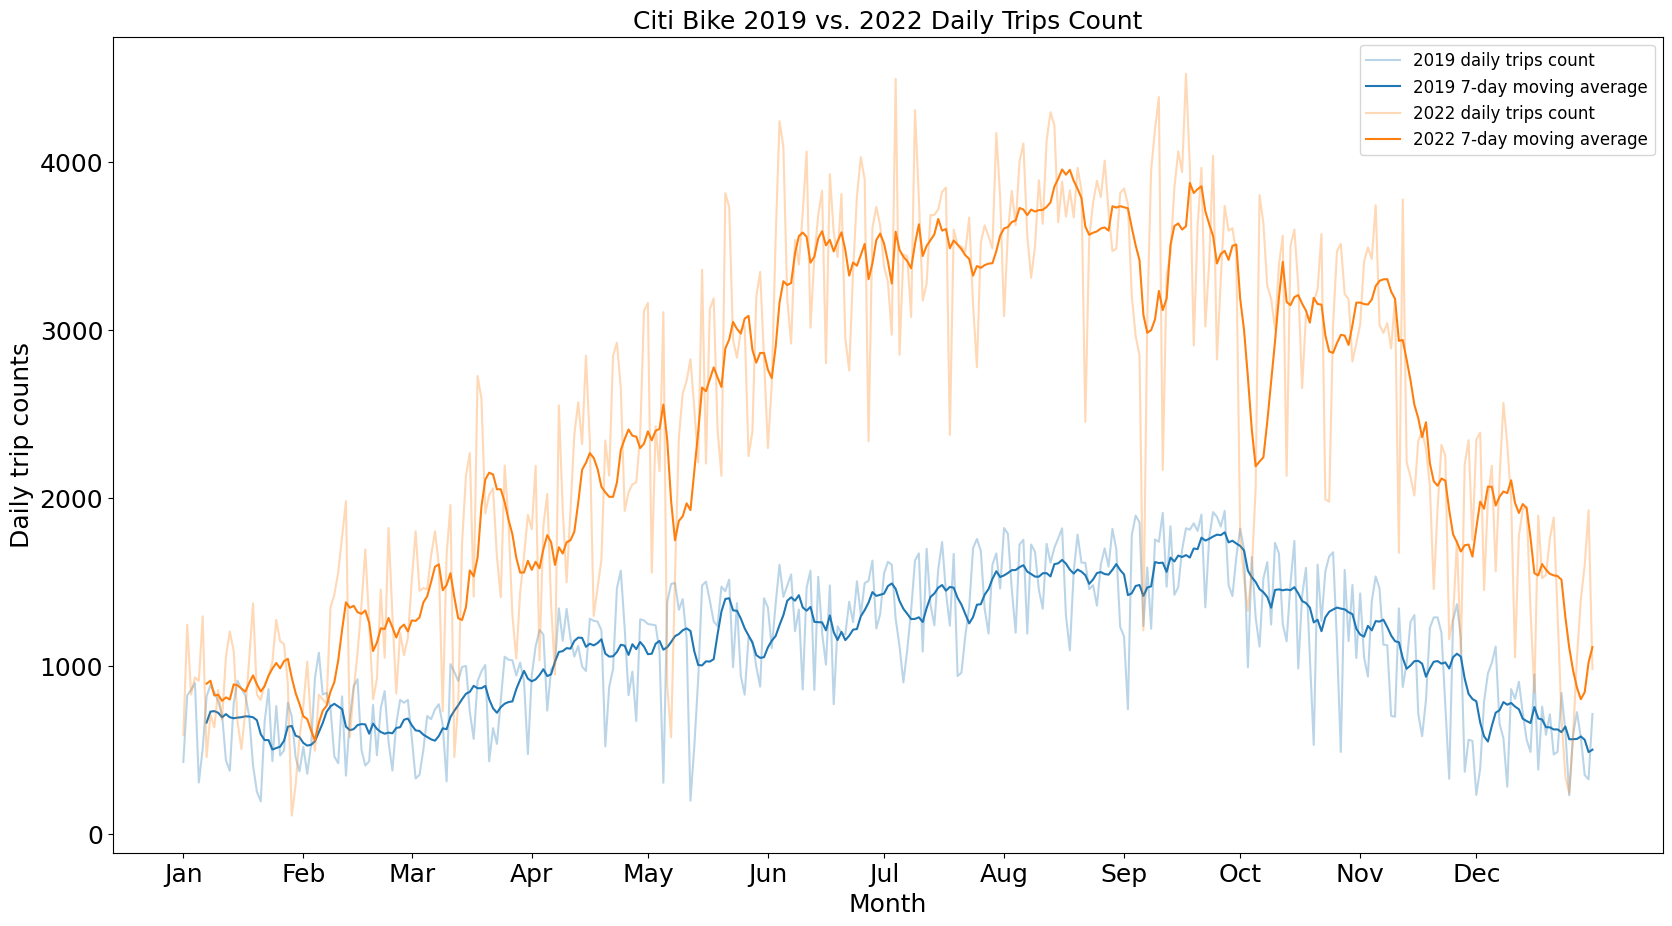

In [285]:
import datetime
dateList2019 = [str(datetime.date(2019, 1, 1) + datetime.timedelta(days=i)) for i in range(365)]
blue = u'#1f77b4'
orange = u'#ff7f0e'

# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2019, daily_trips_count_2019_list, label='2019 daily trips count', alpha=0.3, color = blue)
plt.plot(dateList2019, movingAvg2019, label='2019 7-day moving average', color = blue)
plt.plot(dateList2019, daily_trips_count_2022_list, label='2022 daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2019, movingAvg2022, label='2022 7-day moving average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily trip counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2019[0], end=dateList2019[len(dateList2019) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

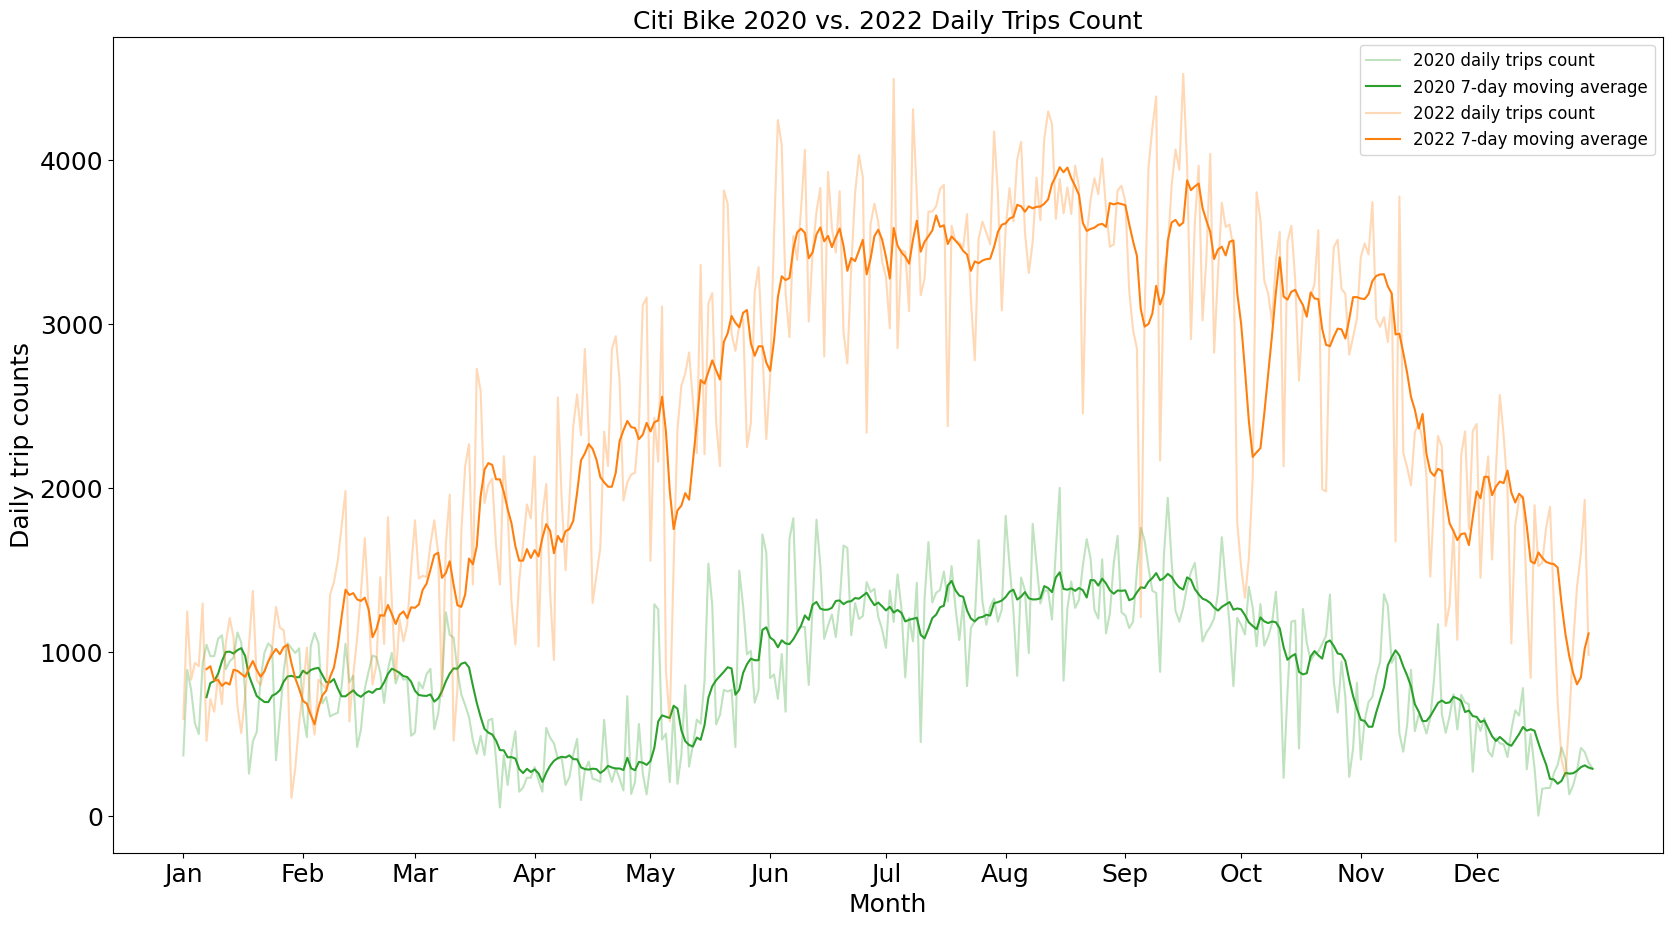

In [286]:
# since 2020 has 366 days and 2022 has 365 days, we need to pad the 
# daily_trips_count_2022_list with a 'NaN' to align the dimension
daily_trips_count_2022_list.append(np.nan)
movingAvg2022.append(np.nan)
dateList2020 = [str(datetime.date(2020, 1, 1) + datetime.timedelta(days=i)) for i in range(366)]
green = u'#2ca02c'

# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2020, daily_trips_count_2020_list, label='2020 daily trips count', alpha=0.3, color = green)
plt.plot(dateList2020, movingAvg2020, label='2020 7-day moving average', color = green)
plt.plot(dateList2020, daily_trips_count_2022_list, label='2022 daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2020, movingAvg2022, label='2022 7-day moving average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily trip counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

In [287]:
# popped the NaN that we've added to the 2022 data once finished plotting
daily_trips_count_2022_list.pop()
movingAvg2022.pop()

nan

In [288]:
# calculate the 7-day moving average for casual and subscribed riders in 2019
daily_trips_casual_2019_list = daily_trips_casual_2019.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()
daily_trips_subscriber_2019_list = daily_trips_subscriber_2019.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

casualAvg2019 = pd.Series(daily_trips_casual_2019_list).rolling(window=7).mean()
casualAvg2019 = casualAvg2019.tolist()

subscriberAvg2019 = pd.Series(daily_trips_subscriber_2019_list).rolling(window=7).mean()
subscriberAvg2019 = subscriberAvg2019.tolist()

In [289]:
# calculate the 7-day moving average for casual and subscribed riders in 2020
daily_trips_casual_2020_list = daily_trips_casual_2020.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()
daily_trips_subscriber_2020_list = daily_trips_subscriber_2020.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

casualAvg2020 = pd.Series(daily_trips_casual_2020_list).rolling(window=7).mean()
casualAvg2020 = casualAvg2020.tolist()

subscriberAvg2020 = pd.Series(daily_trips_subscriber_2020_list).rolling(window=7).mean()
subscriberAvg2020 = subscriberAvg2020.tolist()

In [290]:
# calculate the 7-day moving average for casual and subscribed riders in 2022
daily_trips_casual_2022_list = daily_trips_casual_2022.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()
daily_trips_subscriber_2022_list = daily_trips_subscriber_2022.select('daily_trips_count').rdd.flatMap(lambda x: x).collect()

casualAvg2022 = pd.Series(daily_trips_casual_2022_list).rolling(window=7).mean()
casualAvg2022 = casualAvg2022.tolist()

subscriberAvg2022 = pd.Series(daily_trips_subscriber_2022_list).rolling(window=7).mean()
subscriberAvg2022 = subscriberAvg2022.tolist()

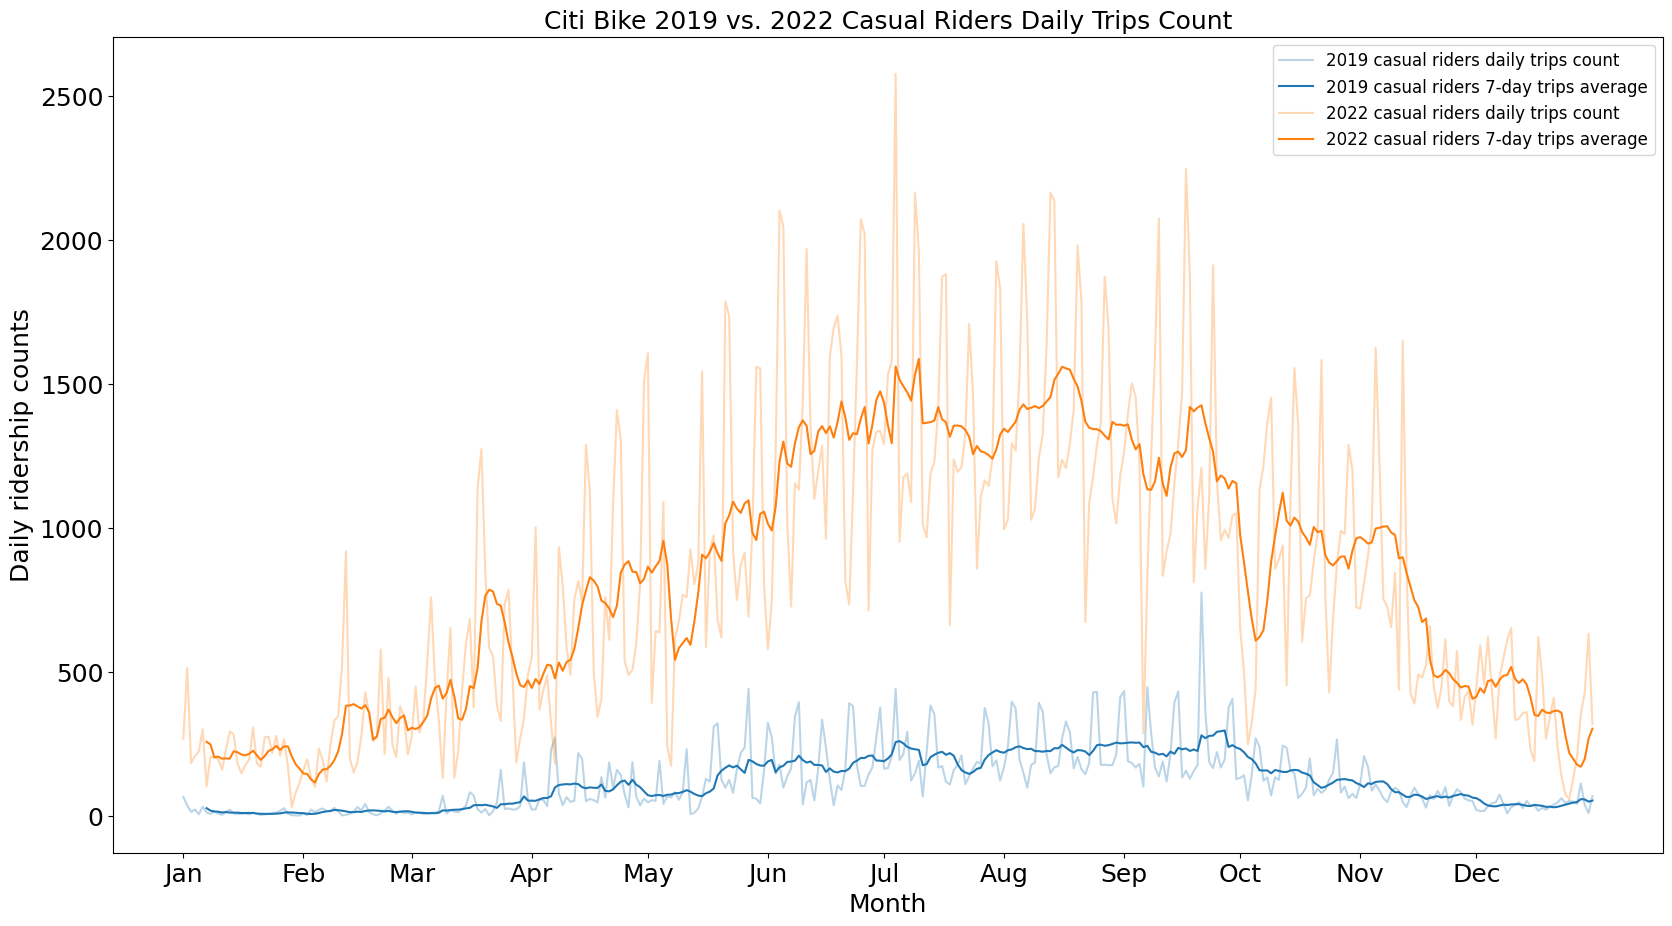

In [291]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2019, daily_trips_casual_2019_list, 
         label='2019 casual riders daily trips count', alpha=0.3, color = blue)
plt.plot(dateList2019, casualAvg2019, 
         label='2019 casual riders 7-day trips average', color = blue)
plt.plot(dateList2019, daily_trips_casual_2022_list, 
         label='2022 casual riders daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2019, casualAvg2022, 
         label='2022 casual riders 7-day trips average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Casual Riders Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2019[0], end=dateList2019[len(dateList2019) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

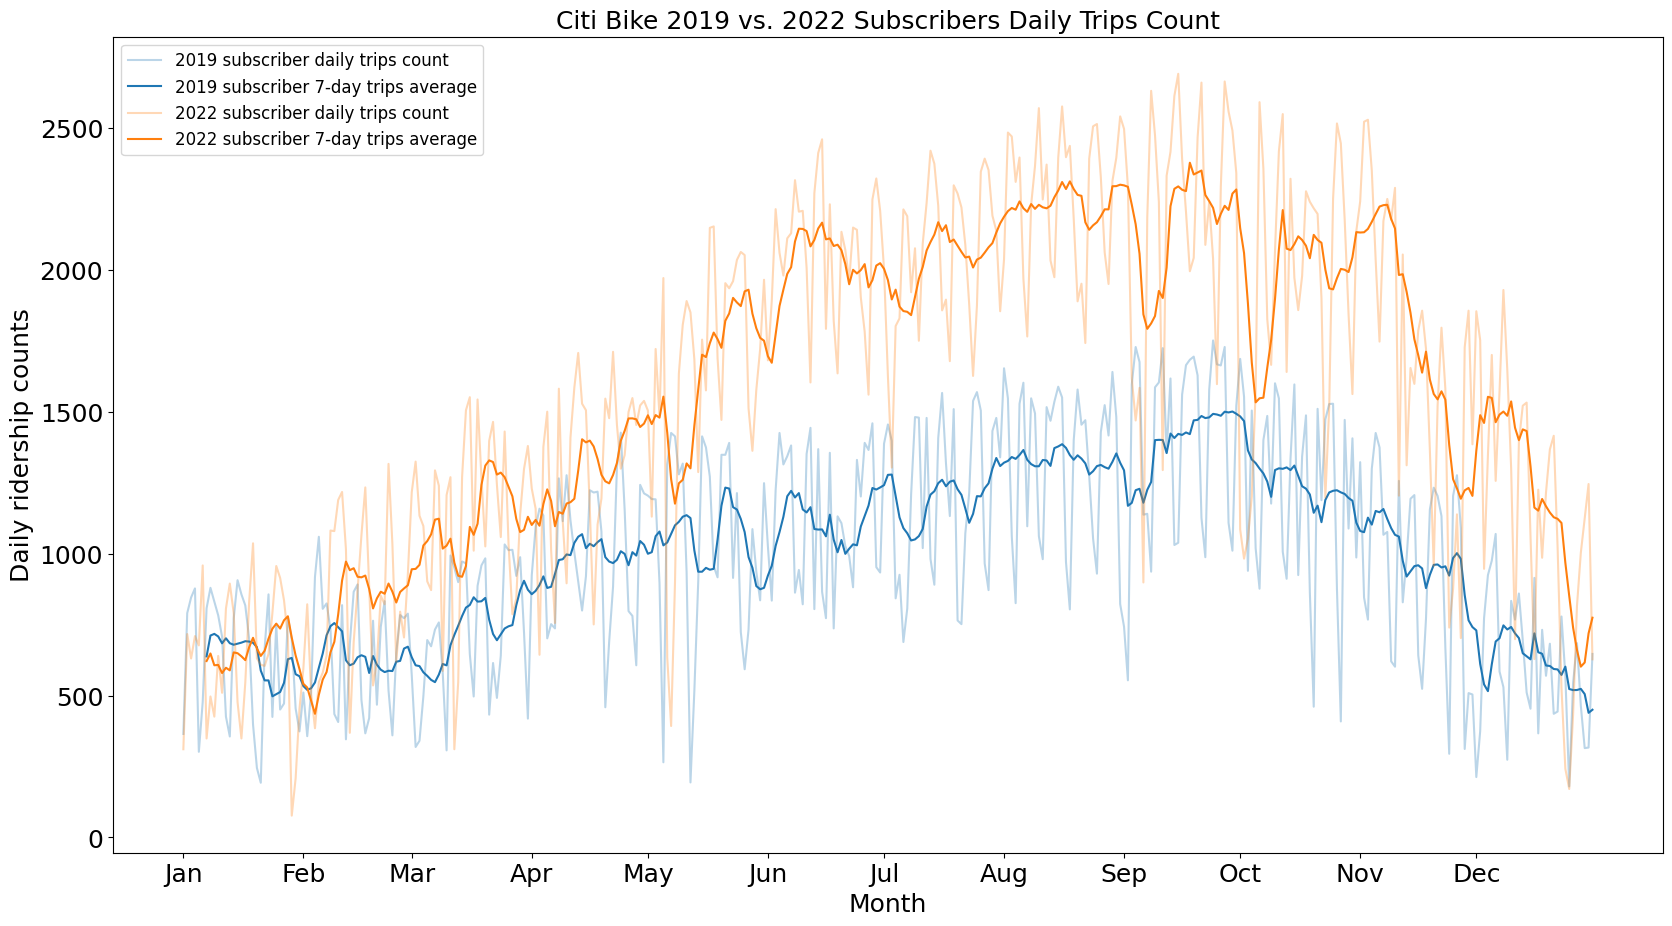

In [292]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2019, daily_trips_subscriber_2019_list, 
         label='2019 subscriber daily trips count', alpha=0.3, color = blue)
plt.plot(dateList2019, subscriberAvg2019, 
         label='2019 subscriber 7-day trips average', color = blue)
plt.plot(dateList2019, daily_trips_subscriber_2022_list, 
         label='2022 subscriber daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2019, subscriberAvg2022, 
         label='2022 subscriber 7-day trips average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Subscribers Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2019[0], end=dateList2019[len(dateList2019) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

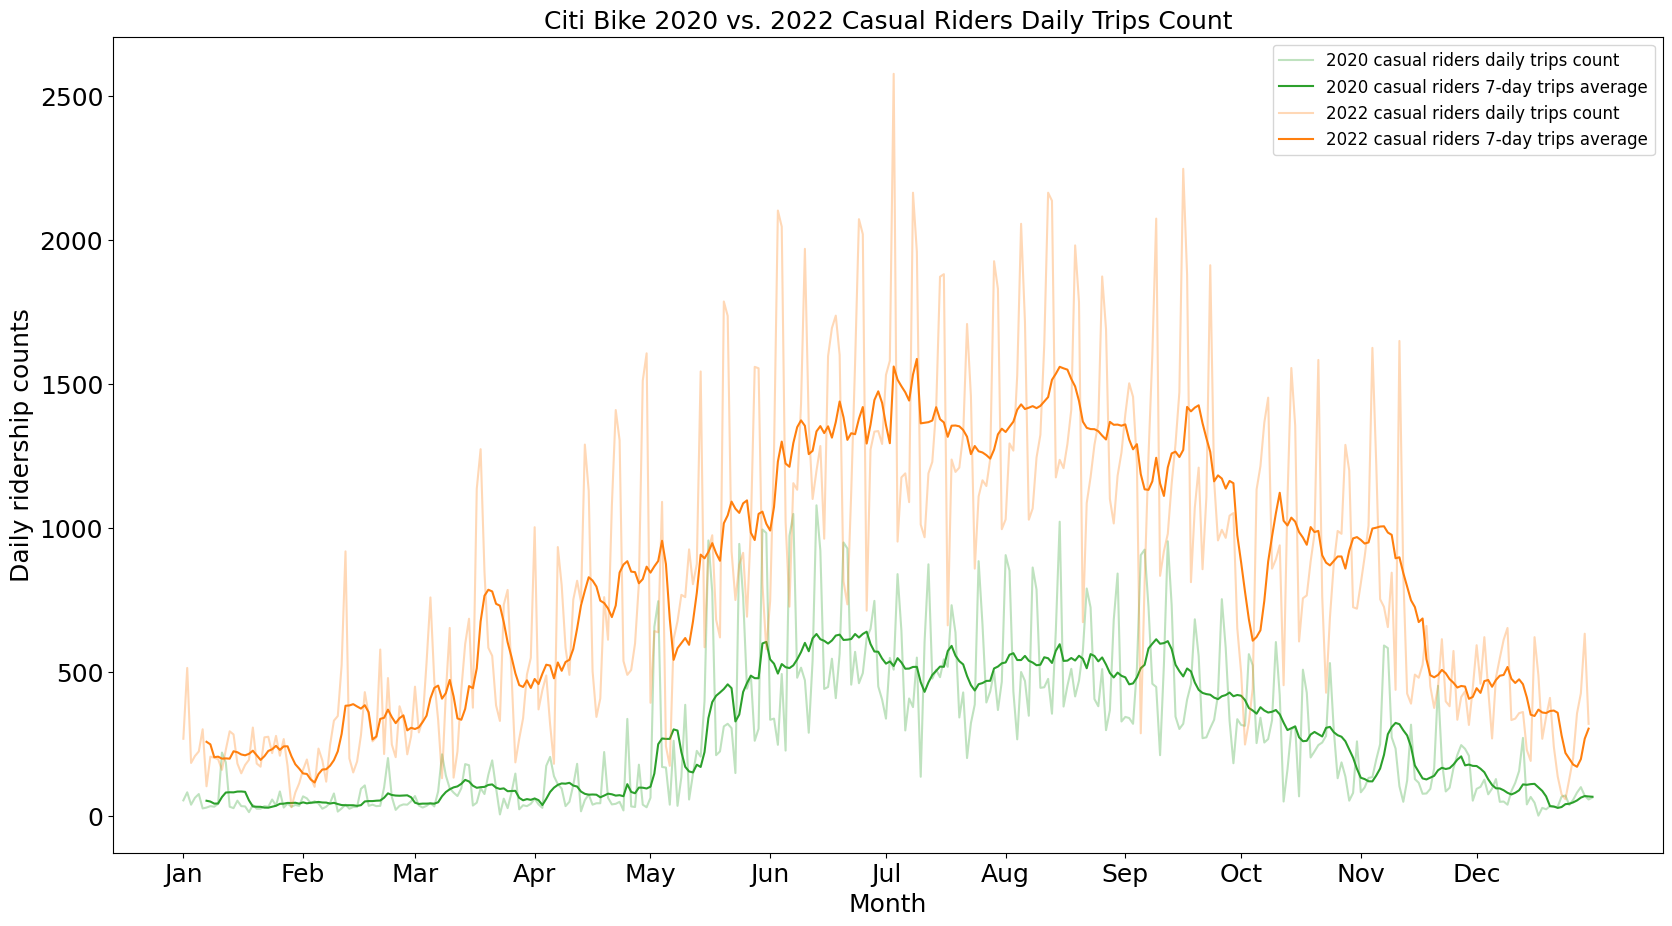

In [293]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# add NaN to daily_trips_casual_2022_list and casualAvg2022 since
# 2022 has 365 instead of 366 days
daily_trips_casual_2022_list.append(np.nan)
casualAvg2022.append(np.nan)

# plot data
plt.plot(dateList2020, daily_trips_casual_2020_list, 
         label='2020 casual riders daily trips count', alpha=0.3, color = green)
plt.plot(dateList2020, casualAvg2020, 
         label='2020 casual riders 7-day trips average', color = green)
plt.plot(dateList2020, daily_trips_casual_2022_list, 
         label='2022 casual riders daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2020, casualAvg2022, 
         label='2022 casual riders 7-day trips average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Casual Riders Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

In [294]:
# poped the NaN that we've added to daily_trips_casual_2022_list and casualAvg2022
daily_trips_casual_2022_list.pop()
casualAvg2022.pop()

nan

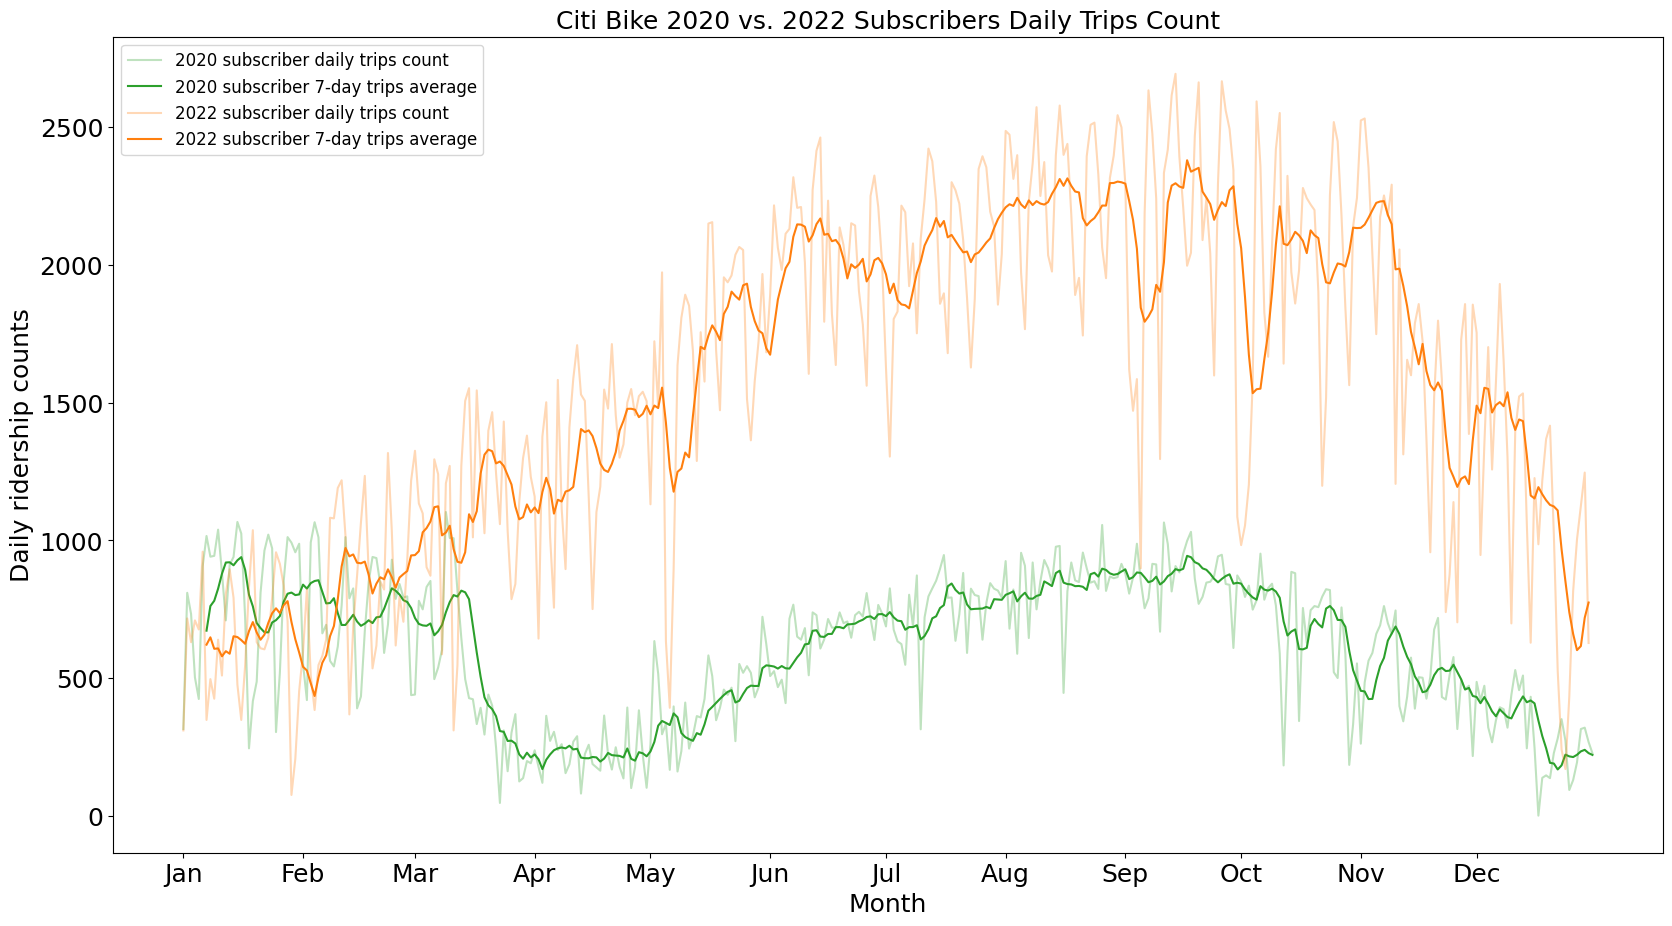

In [295]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# add NaN to daily_trips_subscriber_2022_list and subscriberAvg2022 since
# 2022 has 365 instead of 366 days
daily_trips_subscriber_2022_list.append(np.nan)
subscriberAvg2022.append(np.nan)

# plot data
plt.plot(dateList2020, daily_trips_subscriber_2020_list, 
         label='2020 subscriber daily trips count', alpha=0.3, color = green)
plt.plot(dateList2020, subscriberAvg2020, 
         label='2020 subscriber 7-day trips average', color = green)
plt.plot(dateList2020, daily_trips_subscriber_2022_list, 
         label='2022 subscriber daily trips count', alpha=0.3, color = orange)
plt.plot(dateList2020, subscriberAvg2022, 
         label='2022 subscriber 7-day trips average', color = orange)
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2020 vs. 2022 Subscribers Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily ridership counts', fontsize=18)

# # set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2020[0], end=dateList2020[len(dateList2020) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()

In [296]:
# poped the NaN that we've added to daily_trips_subscriber_2022_list and subscriberAvg2022
daily_trips_subscriber_2022_list.pop()
subscriberAvg2022.pop()

nan